## CS189/289A HW3 code part 1
### Yicheng Chen
### 02/15/2017


---
### Q2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import math

7.38905609893065

In [33]:
def gaussian_2d(miu, cov, x, y):
    pi=3.1415926
    pos = np.array([x, y])
    S = np.linalg.det(cov)
    C = np.linalg.inv(cov)
    g = 1/(2*pi*math.sqrt(S)) * math.exp(-0.5*(pos-miu).dot(C.dot(pos-miu)))
    return g

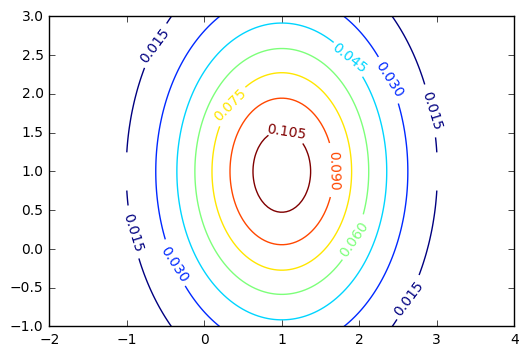

In [45]:
# a
xi, yi = np.linspace(-1, 3, 100), np.linspace(-1, 3, 100)
xi, yi = np.meshgrid(xi, yi)
miu = np.array([1, 1])
cov = np.array([[1, 0], [0, 2]])
z = np.array([gaussian_2d(miu, cov, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
CS = plt.contour(z, extent=[xi.min(), xi.max(), yi.min(), yi.max()])
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.show()

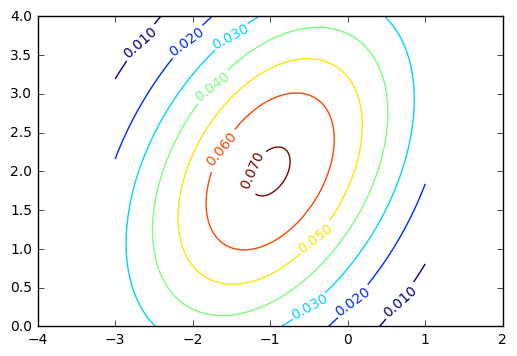

In [49]:
# b
xi, yi = np.linspace(-3, 1, 100), np.linspace(0, 4, 100)
xi, yi = np.meshgrid(xi, yi)
miu = np.array([-1, 2])
cov = np.array([[2, 1], [1, 3]])
z = np.array([gaussian_2d(miu, cov, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
CS = plt.contour(z, extent=[xi.min(), xi.max(), yi.min(), yi.max()])
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.show()

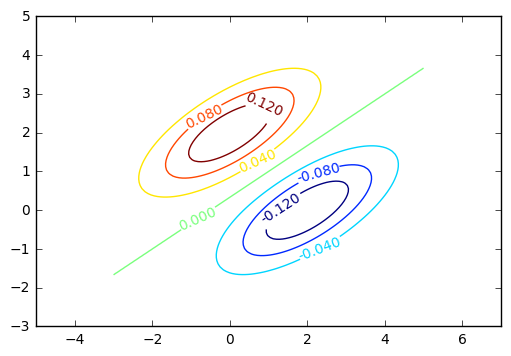

In [53]:
# c
xi, yi = np.linspace(-3, 5, 100), np.linspace(-3, 5, 100)
xi, yi = np.meshgrid(xi, yi)
miu1 = np.array([0, 2])
cov1 = np.array([[2, 1], [1, 1]])
z1 = np.array([gaussian_2d(miu1, cov1, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
miu2 = np.array([2, 0])
cov2 = np.array([[2, 1], [1, 1]])
z2 = np.array([gaussian_2d(miu2, cov2, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
CS = plt.contour(z1-z2, extent=[xi.min(), xi.max(), yi.min(), yi.max()])
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.show()

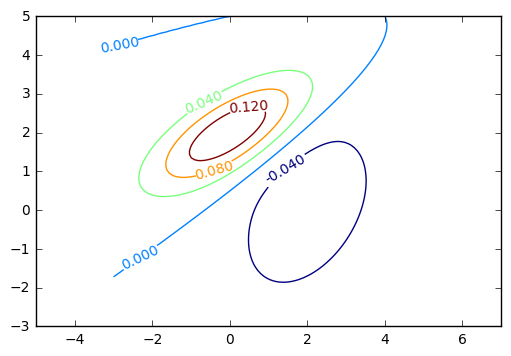

In [55]:
# d
xi, yi = np.linspace(-3, 5, 100), np.linspace(-3, 5, 100)
xi, yi = np.meshgrid(xi, yi)
miu1 = np.array([0, 2])
cov1 = np.array([[2, 1], [1, 1]])
z1 = np.array([gaussian_2d(miu1, cov1, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
miu2 = np.array([2, 0])
cov2 = np.array([[2, 1], [1, 3]])
z2 = np.array([gaussian_2d(miu2, cov2, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
CS = plt.contour(z1-z2, extent=[xi.min(), xi.max(), yi.min(), yi.max()])
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.show()

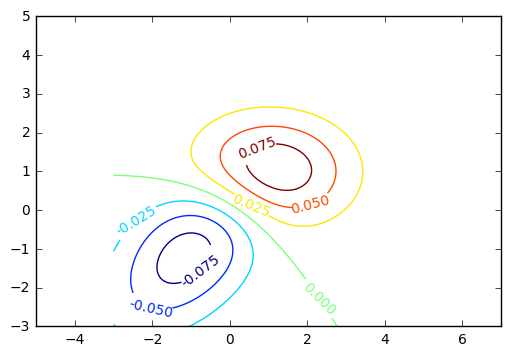

In [56]:
# c
xi, yi = np.linspace(-3, 5, 100), np.linspace(-3, 5, 100)
xi, yi = np.meshgrid(xi, yi)
miu1 = np.array([1, 1])
cov1 = np.array([[2, 0], [0, 1]])
z1 = np.array([gaussian_2d(miu1, cov1, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
miu2 = np.array([-1, -1])
cov2 = np.array([[2, 1], [1, 2]])
z2 = np.array([gaussian_2d(miu2, cov2, x, y) for (x,y) in zip(xi.ravel(), yi.ravel())]).reshape(xi.shape)
CS = plt.contour(z1-z2, extent=[xi.min(), xi.max(), yi.min(), yi.max()])
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.show()

---
## Q3

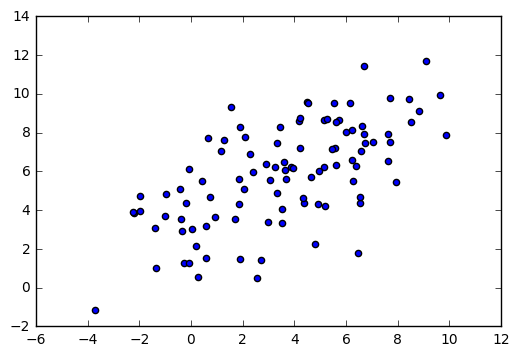

In [66]:
from numpy.random import normal
X1 = normal(3, 3, 100)
X2 = normal(4, 2, 100)
X2 += X1/2

In [74]:
miu = np.array([X1.mean(), X2.mean()])
print("Mean: \n", miu)

Mean: 
 [ 3.55073982  5.84907657]


In [73]:
X = np.vstack((X1, X2))
cov = np.cov(X)
print("Covariance: \n", cov)

Covariance: 
 [[ 9.53074878  5.16187852]
 [ 5.16187852  6.99366966]]


In [79]:
w, v = np.linalg.eig(cov)
print("Eigenvalue: \n", w)
print("Eigenvectors: (each column) \n", v)

Eigenvalue: 
 [ 13.57767557   2.94674287]
Eigenvectors: (each column) 
 [[ 0.78697226 -0.61698839]
 [ 0.61698839  0.78697226]]


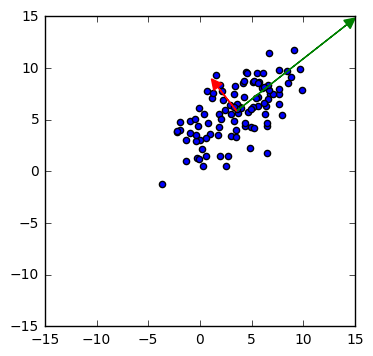

In [109]:
v1 = v[:, 0].dot(w[0])
v2 = v[:, 1].dot(w[1])

plt.scatter(X1, X2)
plt.xlim([-15,15])
plt.ylim([-15,15])
ax = plt.axes()
ax.set_aspect('equal')
ax.arrow(miu[0], miu[1], v1[0], v1[1], head_width=1, head_length=1, fc='g', ec='g')
ax.arrow(miu[0], miu[1], v2[0], v2[1], head_width=1, head_length=1, fc='r', ec='r')
plt.show()

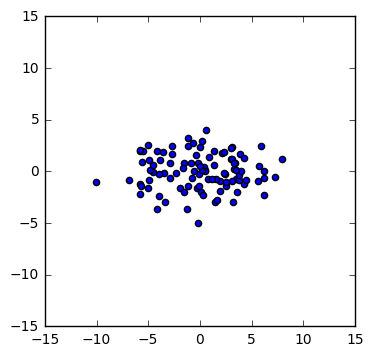

In [123]:
X1c = X1 - miu[0]
X2c = X2 - miu[1]
Xr = v.T.dot(np.array([X1c, X2c]))
plt.scatter(Xr[0, :], Xr[1, :])
plt.xlim([-15,15])
plt.ylim([-15,15])
ax = plt.axes()
ax.set_aspect('equal')
plt.show()